In [1]:
import sys, os
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

output_dir = os.path.join(project_root, "output")

from qc_engine.parser import load_metadata, load_qc_table
from qc_engine.column_namer import rename_analyte_columns
from qc_engine.classifier import classify_qc_table
from qc_engine.report_metadata import extract_all_identifiers

# ------------------------------------------------------------
# User Inputs (only update these)
# ------------------------------------------------------------
path = "G:/GIT/Python-LabQAQC/data/A25-15567Final.xlsx"   # <-- Update file here
lab_name = "Actlabs"                                      # <-- Update lab name here
meta_key = "Report Number"                                # <-- Update metadata key here
date_key = "Report Date"                                  # <-- Update date key here
qc_sheet = "QC"                                           # <-- Update Excel sheet name here

# QC interpretation settings
method_code = "AR-ICPMS"                                     # <-- Update assay method code here. See below for the list of options 
matrix_type = "vegetation"                                      # <-- Update sample type here. See below for a list of options

# QC tolerance settings

crm_low_tol = 80.0                                        # CRM lower recovery tolerance (%), default = 80
crm_high_tol = 120.0                                      # CRM upper recovery tolerance (%), default = 120

duplicate_rpd_tol = 30.0                                  # Duplicate RPD tolerance (%), default = 30

blank_tol_factor = 3.0                                    # Blank exceedance factor (e.g., 3× DL), default = 3

# BDL substitution settings
bdl_sub_rule = "half"                                     # options: "half", "sqrt2", "zero", "dl", or a numeric value



# QC interpretation settings options

valid_method_codes = [
    "AR-ICPMS",
    "AR-ICPOES",
    "4-Acid",
    "FA-AAS",
    "FA-ICP",
    "PhotonAssay",
    "INAA"
]

valid_matrix_types = [
    "rock",
    "soil",
    "till",
    "vegetation",
    "talus",
    "stream sediment",
    "lake sediment"
]

print("Valid method_code options:", valid_method_codes)
print("Valid matrix_type options:", valid_matrix_types)


# ------------------------------------------------------------
# Load metadata + QC table
# ------------------------------------------------------------
metadata = load_metadata(path)      # returns dict
df_qc = load_qc_table(path)

# ------------------------------------------------------------
# Extract identifiers
# ------------------------------------------------------------
file_name, metadata_name, report_date, names_match = extract_all_identifiers(
    path,
    metadata,
    meta_key=meta_key,
    date_key=date_key
)

print("File Name:", file_name)
print("Metadata Name:", metadata_name)
print("Report Date:", report_date)
print("Names Match:", names_match)

# ------------------------------------------------------------
# Continue QC processing
# ------------------------------------------------------------
df_qc = rename_analyte_columns(df_qc, metadata)
df_qc = classify_qc_table(df_qc)

df_qc.head()

Valid method_code options: ['AR-ICPMS', 'AR-ICPOES', '4-Acid', 'FA-AAS', 'FA-ICP', 'PhotonAssay', 'INAA']
Valid matrix_type options: ['rock', 'soil', 'till', 'vegetation', 'talus', 'stream sediment', 'lake sediment']
File Name: A25-15567Final
Metadata Name: A25-15567
Report Date: 14/11/2025
Names Match: False


G:\Anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
G:\Anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Sample,Ag_ppb,Al_ppm,As_ppb,Au_ppb,B_ppm,Ba_ppb,Be_ppb,Bi_ppb,Ca_ppm,...,Tl_ppb,Tm_ppb,U_ppb,V_ppb,W_ppb,Y_ppb,Yb_ppb,Zn_ppb,Zr_ppb,QC_Type
0,CLV-1 Meas,NaN,NaN,NaN,NaN,10,52500,NaN,NaN,6290,...,NaN,NaN,96300,NaN,NaN,NaN,NaN,78700,NaN,CRM
1,CLV-1 Cert,NaN,NaN,NaN,NaN,10,49300,NaN,NaN,5940,...,NaN,NaN,98500,NaN,NaN,NaN,NaN,74000,NaN,CRM
2,CLV-2 Meas,NaN,NaN,NaN,NaN,35,23000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRM
3,CLV-2 Cert,NaN,NaN,NaN,NaN,43,22500,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRM
4,CDV-1 Meas,10,1150,1300,2.5,16,8100,NaN,20,19500,...,NaN,NaN,169,4350,NaN,1360,NaN,23200,1300,CRM


In [2]:
from qc_engine.crm_wide import compute_crm_recovery

crm_results = compute_crm_recovery(
    df_qc,
    metadata,
    low_tol=crm_low_tol,
    high_tol=crm_high_tol
)

crm_results.head()

,CRM,Analyte,Unit,Measured,Certified,DL,Recovery,Bias,CRM_Status
0,CLV-1,Ag,ppb,NaN,NaN,3.0,,,NotApplicable
1,CLV-2,Ag,ppb,NaN,NaN,3.0,,,NotApplicable
2,CDV-1,Ag,ppb,10.0,9.0,3.0,,,Below10xDL
3,CLV-1,Al,ppm,NaN,NaN,4.0,,,NotApplicable
4,CLV-2,Al,ppm,NaN,NaN,4.0,,,NotApplicable


In [3]:
from qc_engine.parser import load_metadata, load_qc_table
from qc_engine.column_namer import rename_analyte_columns
from qc_engine.classifier import classify_qc_table
from qc_engine.duplicate_wide import compute_duplicate_rpd

metadata = load_metadata(path)
df_qc = load_qc_table(path)

df_qc = rename_analyte_columns(df_qc, metadata)
df_qc = classify_qc_table(df_qc)

dup_results = compute_duplicate_rpd(
    df_qc,
    metadata,
    rpd_tolerance=duplicate_rpd_tol
)

dup_results.head()

G:\Anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Sample,Analyte,Unit,Orig,Dup,Orig_num,Dup_num,DL,Above10xDL,RPD,Status
0,PF25TR04,Ag,ppb,15,15,15.0,15.0,3.0,False,,Below10xDL
1,PF25TR04,Al,ppm,1740,1630,1740.0,1630.0,4.0,True,6.52819,OK
2,PF25TR04,As,ppb,40,40,40.0,40.0,10.0,False,,Below10xDL
3,PF25TR04,Au,ppb,< 0.2,< 0.2,0.1,0.1,0.2,False,,BothBDL
4,PF25TR04,B,ppm,8,7,8.0,7.0,1.0,False,,Below10xDL


In [4]:
from qc_engine.blank_wide import compute_blank_qc

blank_results = compute_blank_qc(
    df_qc,
    metadata,
    tolerance_factor=blank_tol_factor,
    bdl_rule=bdl_sub_rule
)

blank_results.head()

,Analyte,Unit,DL,Values,Average,StDev,Blank_Status
0,Ag,ppb,3.0,[< 3],1.5,0.0,OK
1,Al,ppm,4.0,[< 4],2.0,0.0,OK
2,As,ppb,10.0,[< 10],5.0,0.0,OK
3,Au,ppb,0.2,[< 0.2],0.1,0.0,OK
4,B,ppm,1.0,[< 1],0.5,0.0,OK


In [5]:
from qc_engine.qc_summary import build_qc_summary

summary = build_qc_summary(crm_results, dup_results, blank_results)
summary.head()

,Analyte,Unit,CRM_Recovery,CRM_Bias,CRM_PassCount,CRM_FailCount,CRM_NeedsInvestigationCount,CRM_Below10xDLCount,CRM_NotApplicableCount,CRM_NotEvaluatedCount,...,Duplicate_FailCount,Duplicate_BDLSubCount,Duplicate_BothBDLCount,Duplicate_Below10xDLCount,Duplicate_NotEvaluatedCount,Duplicate_TotalEvaluated,Blank_Average,Blank_StDev,Blank_Status,Final_QC_Flag
0,Ag,ppb,NaN,NaN,0,0,0,1,2,0,...,0,0,0,1,0,0,1.5,0.0,OK,Pass
1,Al,ppm,76.666667,-23.333333,0,1,0,0,2,0,...,0,0,0,0,0,1,2.0,0.0,OK,Needs Investigation
2,As,ppb,100.000000,0.000000,1,0,0,0,2,0,...,0,0,0,1,0,0,5.0,0.0,OK,Pass
3,Au,ppb,108.695652,8.695652,1,0,0,0,2,0,...,0,0,1,0,0,0,0.1,0.0,OK,Pass
4,B,ppm,104.909561,4.909561,2,1,0,0,0,0,...,0,0,0,1,0,0,0.5,0.0,OK,Needs Investigation


In [6]:
# CRM summary for plotting
crm_summary = summary[["Analyte", "CRM_Recovery", "CRM_FinalStatus"]]

# Duplicate summary for plotting
dup_summary = summary[["Analyte", "Duplicate_RPD", "Duplicate_Status"]]

# Blank summary for plotting (use raw blank_results ONLY)
blank_plot_data = blank_results.rename(columns={"Status": "Blank_Status"})


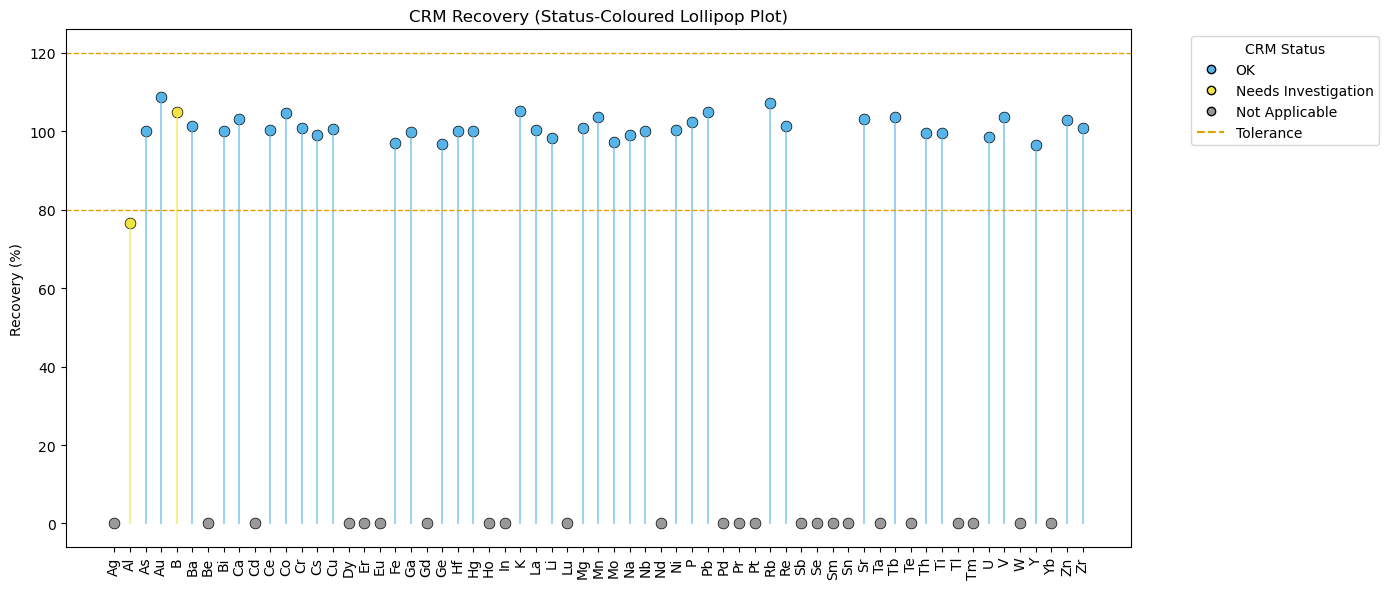

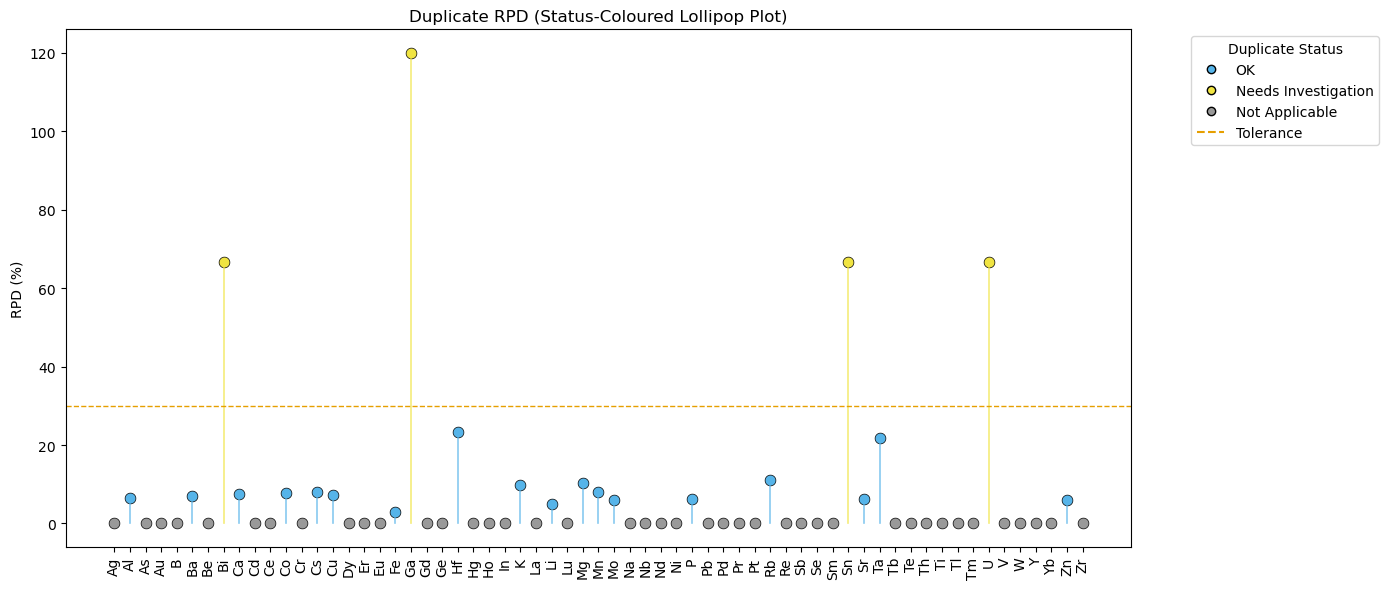

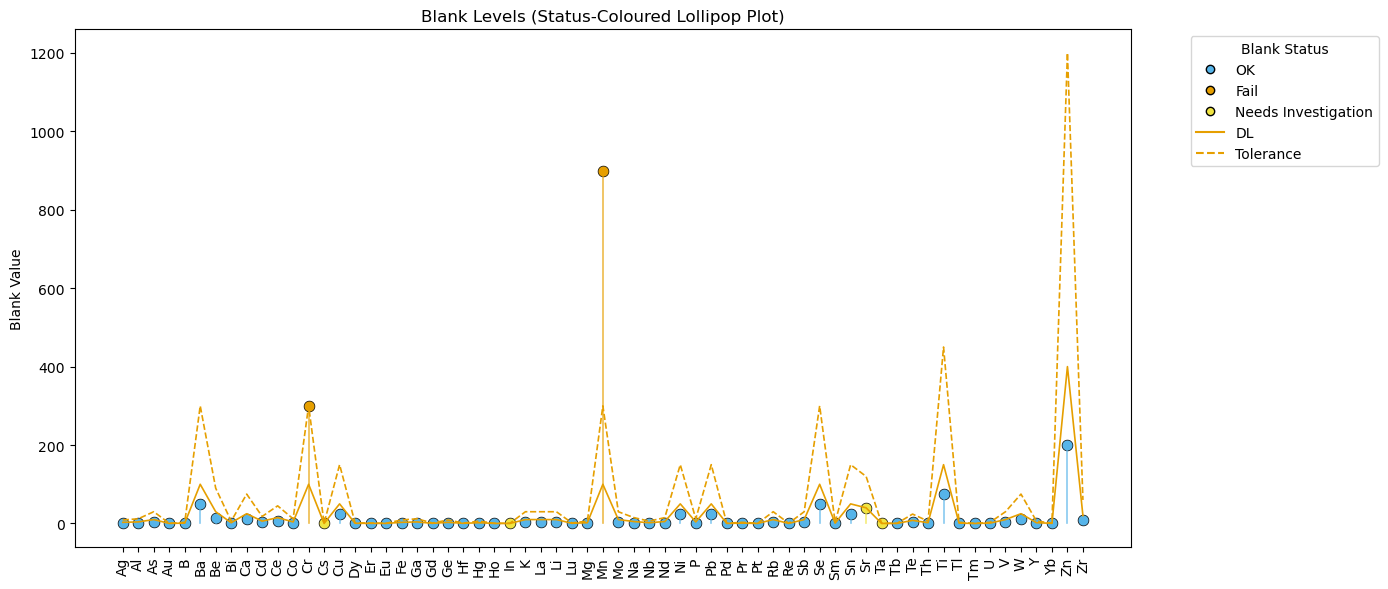

In [7]:
from qc_engine.qc_plots import plot_crm_recovery, plot_duplicate_rpd, plot_blank_levels

# Build certificate order from metadata
certificate_order = [metadata[i]["analyte"] for i in sorted(metadata.keys())]

# Display plots for visual inspection
fig_crm = plot_crm_recovery(crm_summary, certificate_order)
fig_dup = plot_duplicate_rpd(dup_summary, certificate_order)
fig_blank = plot_blank_levels(blank_plot_data, certificate_order)

In [8]:
from qc_engine.report_export import save_qc_plot

save_qc_plot(
    fig=fig_crm,
    lab_name=lab_name,
    metadata_name=metadata_name,
    report_date=report_date,
    plot_type="CRM Recovery",
    outdir=output_dir
)

save_qc_plot(
    fig=fig_dup,
    lab_name=lab_name,
    metadata_name=metadata_name,
    report_date=report_date,
    plot_type="Duplicate RPD",
    outdir=output_dir
)

save_qc_plot(
    fig=fig_blank,
    lab_name=lab_name,
    metadata_name=metadata_name,
    report_date=report_date,
    plot_type="Blank Levels",
    outdir=output_dir
)

Saved: G:\GIT\Python-LabQAQC\output/CRM_Recovery_A25-15567_20260114_1415.png
Saved: G:\GIT\Python-LabQAQC\output/Duplicate_RPD_A25-15567_20260114_1415.png
Saved: G:\GIT\Python-LabQAQC\output/Blank_Levels_A25-15567_20260114_1415.png


In [9]:
import importlib
import qc_engine.interpretation as interp
importlib.reload(interp)

from qc_engine.interpretation import generate_qc_interpretation

In [10]:
qc_text = generate_qc_interpretation(
    crm_results=crm_results,
    dup_results=dup_results,
    blank_results=blank_results,
    df_qc=df_qc,
    method_code=method_code,
    lab_name=lab_name,
    file_name=file_name,
    metadata_name=metadata_name,
    report_date=report_date,
    matrix_type=matrix_type,
    crm_low_tol=crm_low_tol,
    crm_high_tol=crm_high_tol,
    duplicate_rpd_tol=duplicate_rpd_tol,
    blank_tol_factor=blank_tol_factor,
    bdl_sub_rule=bdl_sub_rule
)


print(qc_text)

QC Summary for A25-15567Final (Metadata: A25-15567, Date: 14/11/2025)
Laboratory: Actlabs

This batch includes 5 total samples, consisting of 3 CRM samples, 1 duplicate samples, and 1 blanks.

Understanding the digestion chemistry and detection technique is important for interpreting CRM recoveries, duplicate precision, and blank performance. The method used for this batch is summarized below.

Aqua regia digestion (HCl–HNO₃) combined with ICP‑MS detection provides high sensitivity for trace elements. The digestion effectively dissolves sulfides, carbonates, and other labile hosts, but does not fully decompose silicate minerals or refractory phases such as zircon, chromite, barite, or monazite. As a result, elements hosted in resistant minerals may show systematic under‑recovery. ICP‑MS offers low detection limits but is susceptible to matrix‑dependent polyatomic interferences (e.g., Cl‑based species, oxide/hydroxide clusters), depending on whether collision/reaction cell technology is